In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from google.colab import drive
import os

drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/Data Science/Proyecto final/Dataset/'
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')
sns.set(rc={'figure.figsize':(15,5.5)})

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data Science/Proyecto final/Dataset


#StoryTelling

Un accidente cerebro vascular (ACV) es una emergencia medica dada por la disminución del flujo sanguineo que recibe el cerebro, produciendo la muerte de las celulas. Cuando un ACV no es atacado a tiempo puede producir daños irreparables e incluso la muerte.
Una de las formas de reducir el riesgo de ACVs es poder predecir su ocurrencia, es por esto que se utilizó el dataset "Healthcare dataset stroke data", obtenido en Kaggle, para poder tener más información sobre la situación socioambiental de diferentes pacientes que han tenido ACVs en el tiempo.

Una vez obtenidos los datos de los pacientes se identificaron algunos parametros clave para estructurar la información: Genero, si el paciente vive en zonas rurales o no, si el paciente es o fue fumador, indice glucemico, entre otros.

Haciendo un primer acercamiento a los datos se observó que de las personas que tuvieron un ACV, el numero de pacientes de genero femenino es un 40% superior a los pacientes de genero masculino. Tambien se analizó la zona donde viven los pacientes, identificando que la diferencia entre pacientes que sufrieron ACVs y viven en zonas rurales no es significativa respecto a los que viven en zonas urbanizadas.
Un dato importante obtenido del estudio inicial del dataset es que, contrario a la creencia previa, el tener un indice de masa corporal (BMI por sus siglas en ingles) alto no pareciera tener correlación directa con la probabilidad de sufrir un ACV.
Por ultimo, a partir del análisis de datos focalizandose en la edad, se puede observar que a medida que los pacientes envejecen tienen mayor probabilidad de sufrir un ACV, siendo la edad promedio de los pacientes que han sufrido ACVs los 70 años.

# Abstracto

Un accidente cerebro vascular (ACV) es una emergencia médica dada por la disminución del flujo sanguineo que recibe el cerebro, produciendo la muerte de las celulas. El tratamiento temprano de esta enfermedad puede minimizar el daño cerebral ocasionado.


En este proyecto se intenta desarrollar un modelo que permita identificar y predecir si, dadas ciertas caracteristicas fisicas y ambientales de una persona, es probable que la misma sufra un ACV en algun momento cercano de su vida.

# Definición de objetivo

Desarrollar un modelo que permita predecir la probabilidad de que una persona sufra un ACV, dadas ciertas características de la misma

# Contexto comercial

El daño cerebral causado por un ACV disminuye si se hace una detección temprana del mismo, es por esto que se busca introducir una herramienta que permita, dadas ciertas características físicas y socioambientales de una persona, detectar si podría sufrir un ACV en algun momento cercano de su vida a fin de prevenir la ocurrencia y/o disminuir los daños cerebrales causados por la ocurrencia del mismo.
Se cuenta con registros de pacientes que incluyen datos como zona de residencia, si la persona fuma o fumó, niveles de glucosa en sangre, si presenta cardiopatías, entre otros.

# Problema comercial

A partir de los datos que se tiene sobre los diversos pacientes y su estado fisico y socioambiental, se busca formatear los datos, obtener visualizaciones que permitan responder preguntas relacionadas a qué probabilidades tiene el paciente de sufrir un ACV, y desarrollar un modelo que permita predecir si dadas las caracteristicas de un paciente, el mismo podría llegar a sufrir un ACV o no.


# Contexto analítico

Se obtuvo un archivo CSV (descargado de la pagina Kaggle y almacenado dentro de la carpeta Dataset bajo el nombre healthcare-dataset-stroke-data.csv) que contiene detalles sobre cada paciente estudiado.

# Exploración de datos

In [43]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [45]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [46]:
for col in df:
    print(df[col].unique())

[ 9046 51676 31112 ... 19723 37544 44679]
['Male' 'Female' 'Other']
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4

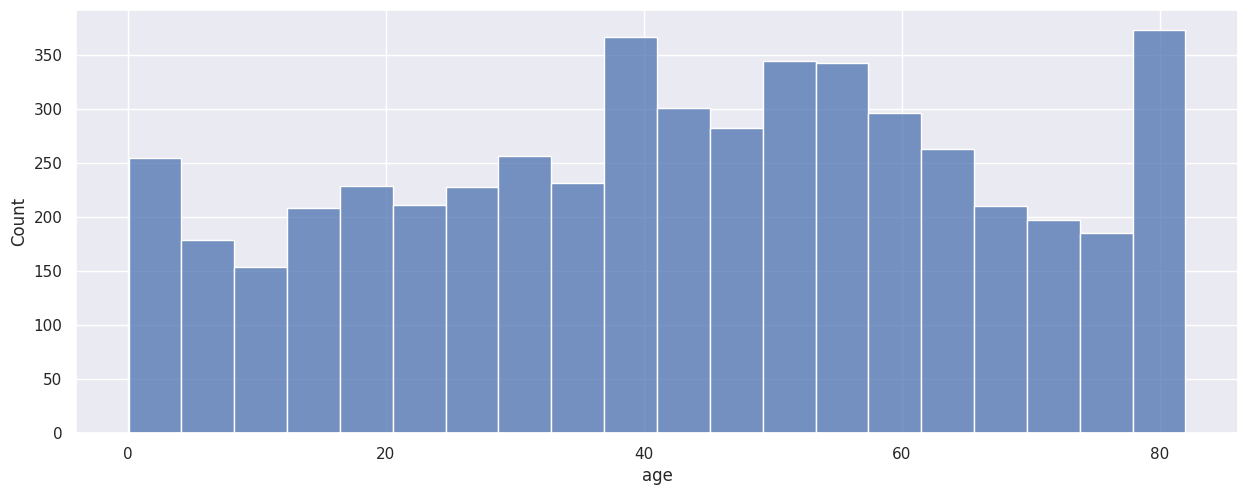

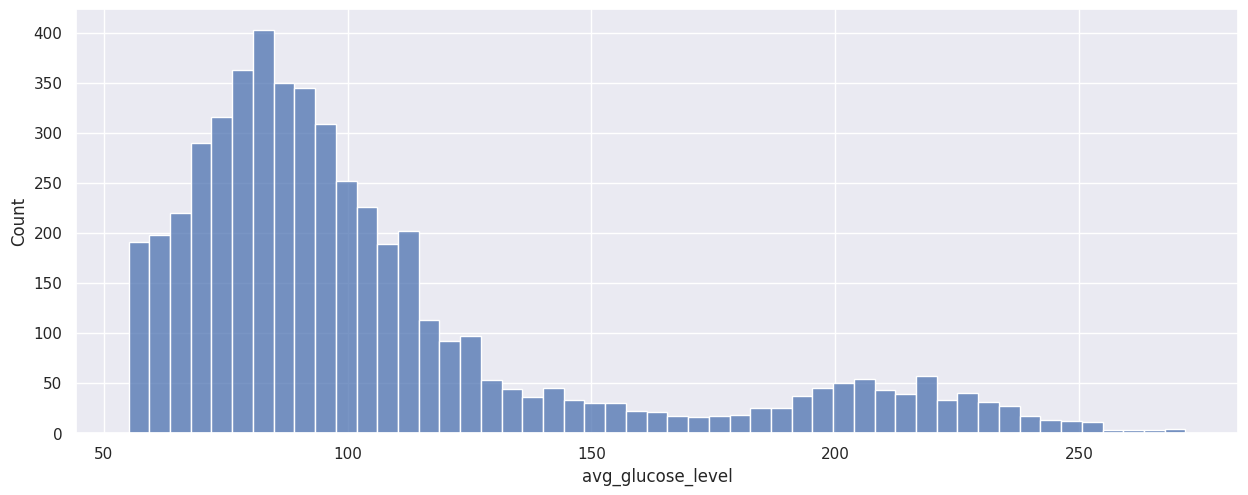

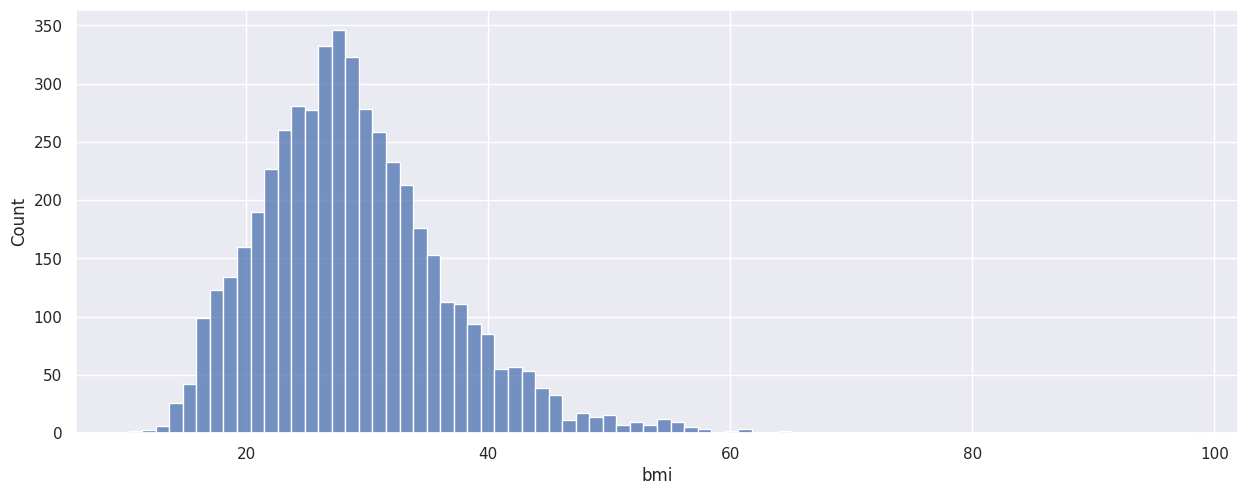

In [47]:
df_num_columns=df.drop(['id','ever_married','gender', 'work_type', 'Residence_type', 'smoking_status', 'stroke', 'hypertension', 'heart_disease'], axis=1)
for col in df_num_columns:
    sns.histplot(data=df_num_columns, x=df_num_columns[col])
    plt.show()

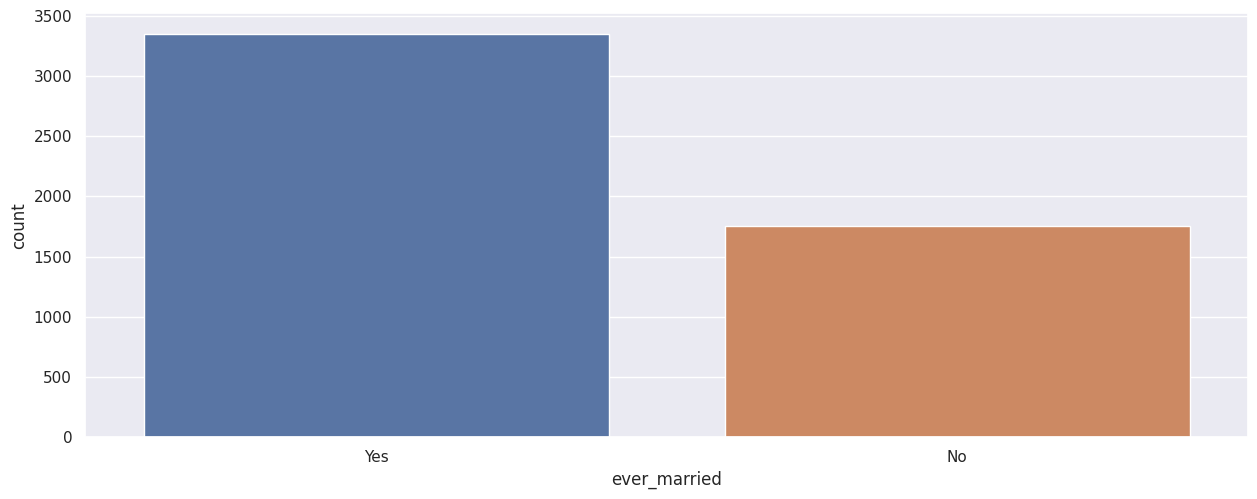

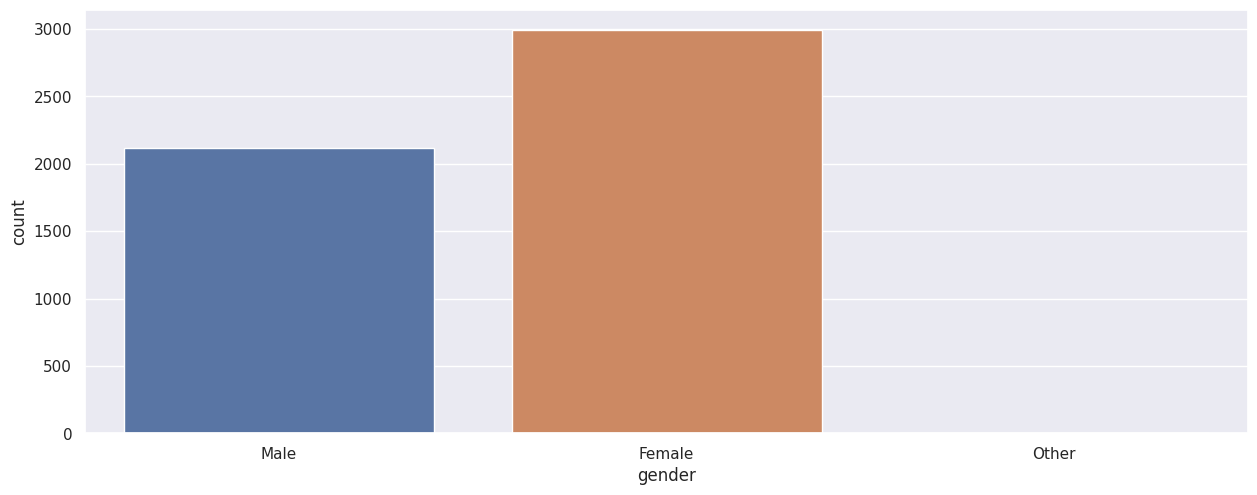

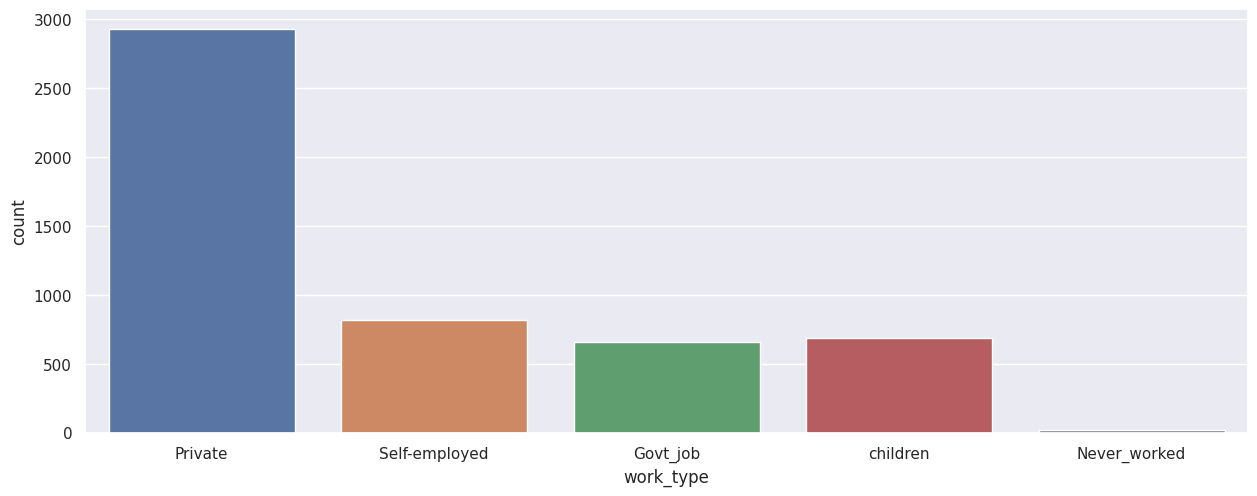

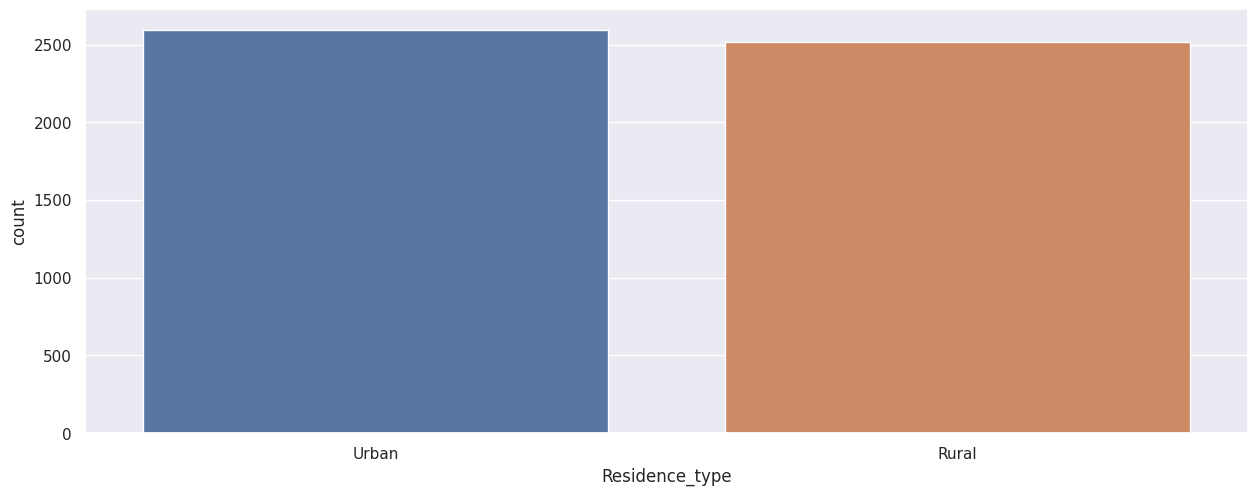

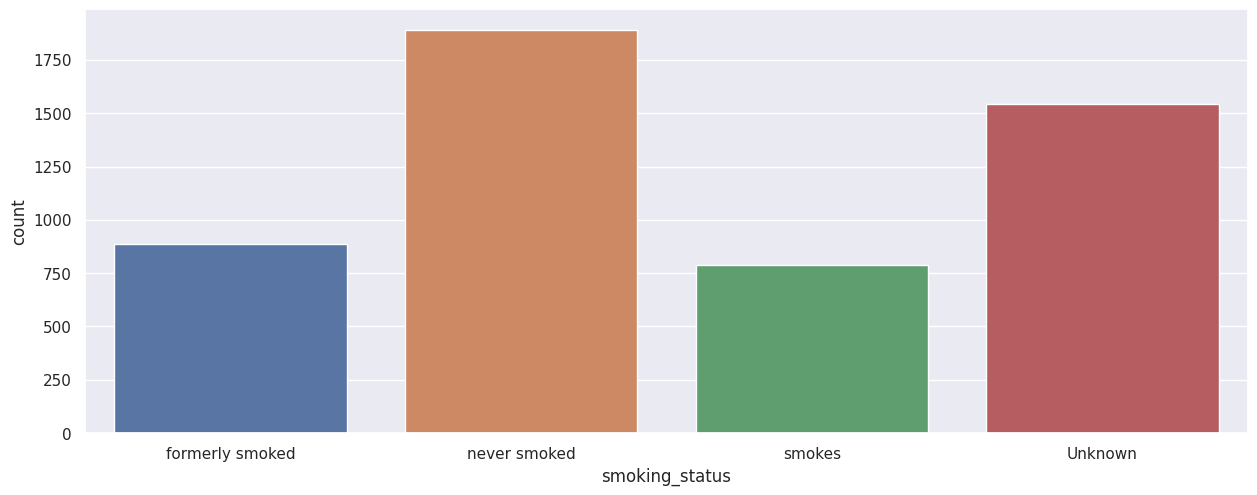

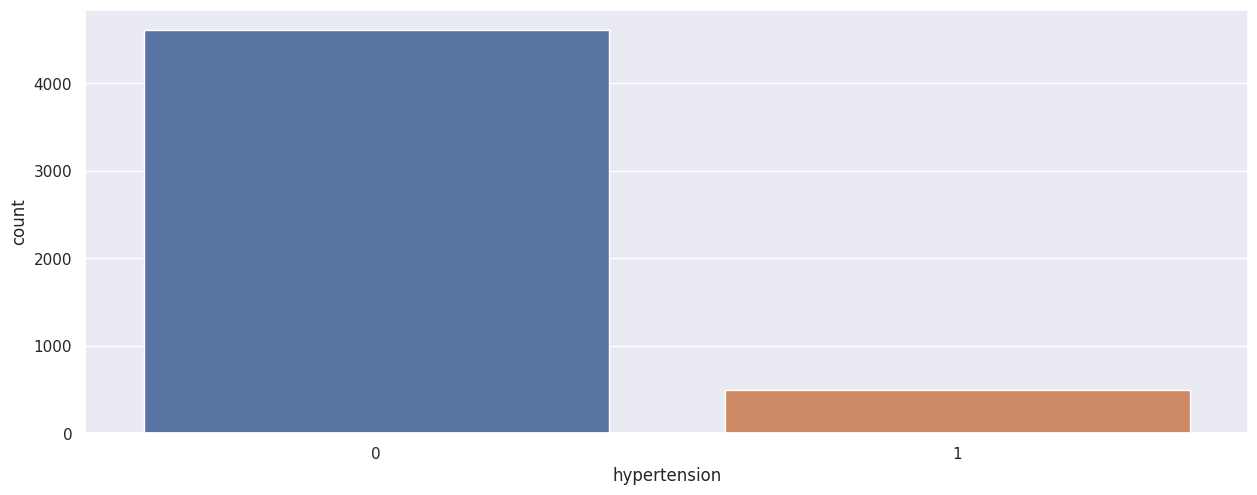

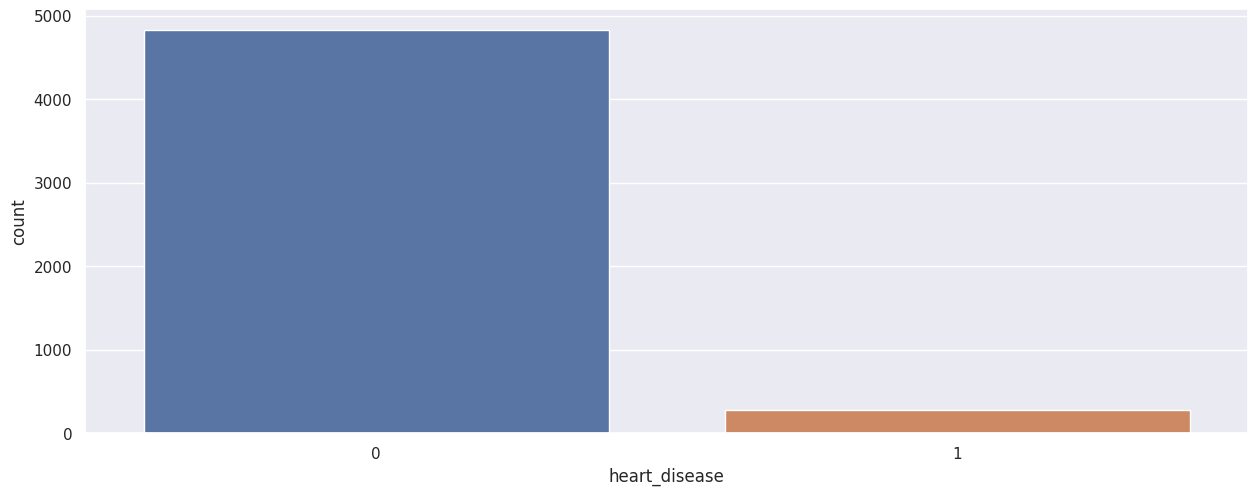

In [48]:
df_categorical_columns=df[['ever_married','gender', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']]
for col in df_categorical_columns:
    sns.countplot(data=df_categorical_columns, x=df_categorical_columns[col])
    plt.show()

## Nivel de glucosa vs BMI

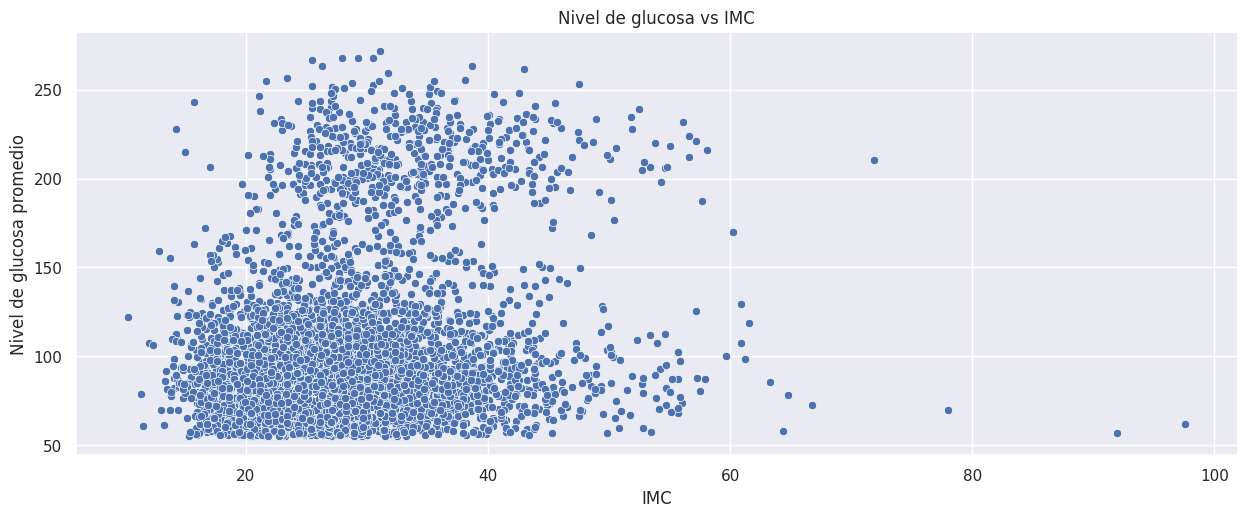

In [49]:
glucoseBMI=sns.scatterplot(df, x='bmi', y='avg_glucose_level')
glucoseBMI.set(xlabel="IMC", ylabel="Nivel de glucosa promedio", title="Nivel de glucosa vs IMC")
plt.show()

## Nivel de glucosa vs edad

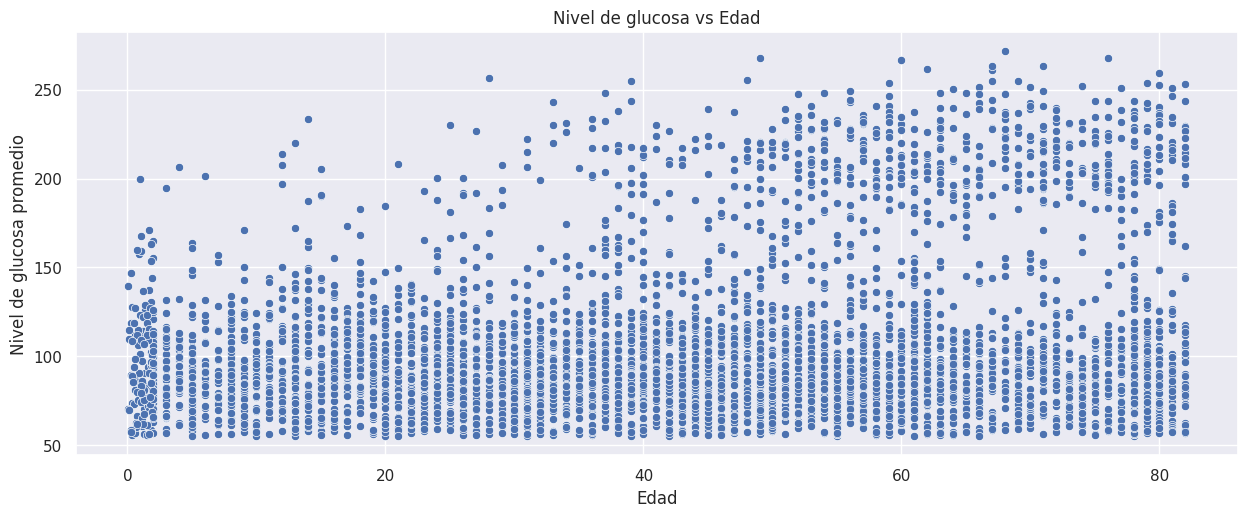

In [50]:
glucoseAge=sns.scatterplot(df, x='age', y='avg_glucose_level')
glucoseAge.set(xlabel="Edad", ylabel="Nivel de glucosa promedio", title="Nivel de glucosa vs Edad")
plt.show()

# Preguntas/ hipotesis

## La cantidad de personas que tuvieron ACVs y son mujeres es mayor a la cantidad de hombres que tuvieron ACVs

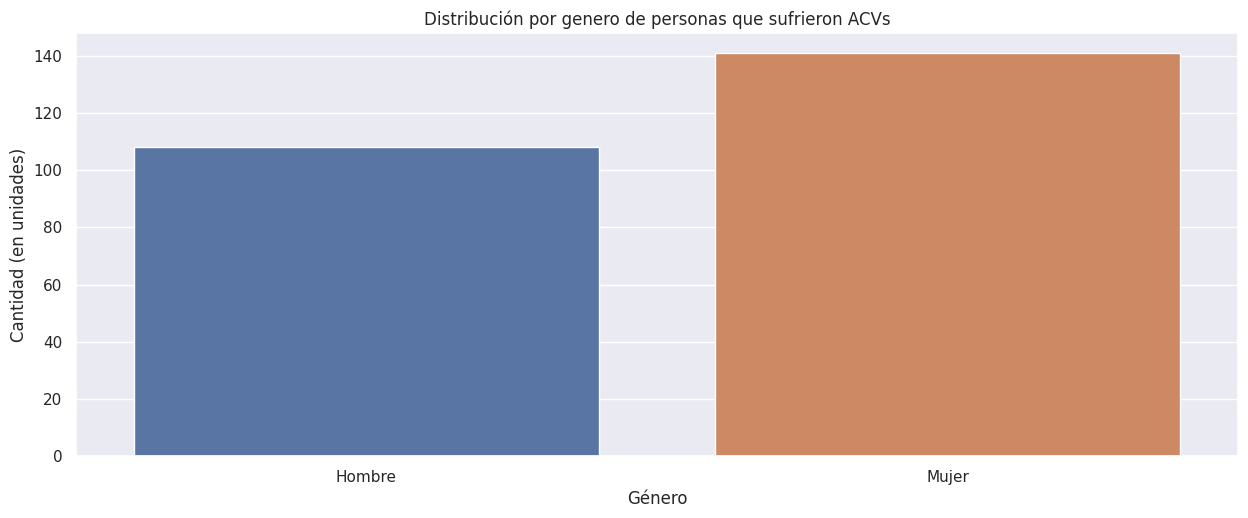

In [51]:
df_stroke_true=df[df['stroke']==True]
qtyACV=sns.countplot(data=df_stroke_true, x='gender')
qtyACV.set(xlabel="Género", ylabel="Cantidad (en unidades)", xticklabels=["Hombre", "Mujer"], title="Distribución por genero de personas que sufrieron ACVs")
plt.show()

## Las personas con obesidad (bmi mayor a 30) siempre tienen ACVs

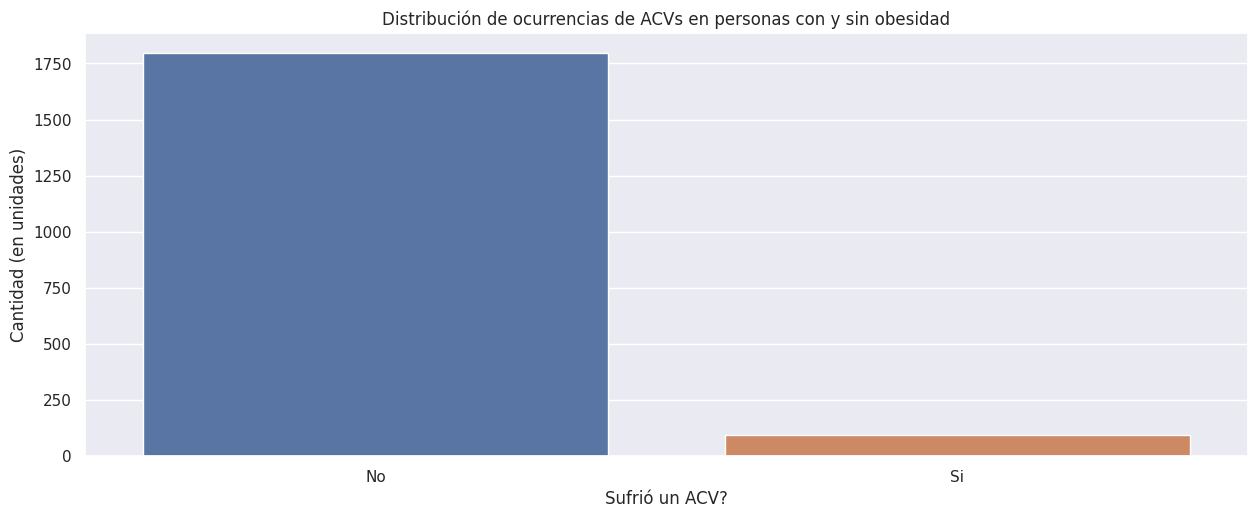

In [52]:
df_obesity=df[df['bmi']>30]
obesity=sns.countplot(df_obesity, x='stroke')
obesity.set(xlabel="Sufrió un ACV?", ylabel="Cantidad (en unidades)", xticklabels=["No", "Si"], title="Distribución de ocurrencias de ACVs en personas con y sin obesidad")
plt.show()

## La probabilidad de tener un ACV aumenta con la edad

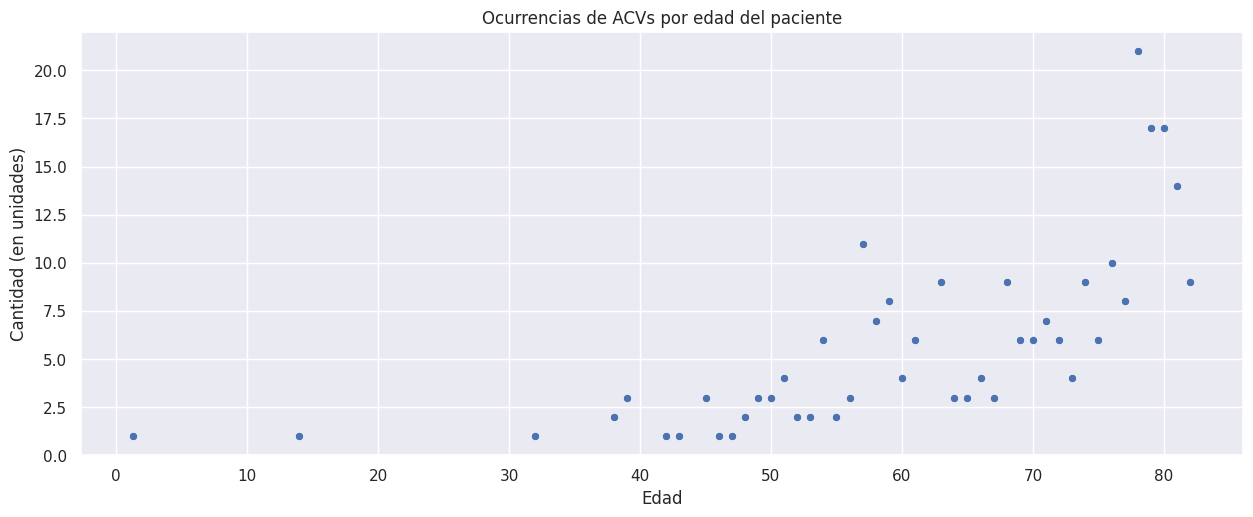

In [53]:
stroke_count=df_stroke_true.groupby(['age'])['age'].count().reset_index(name='count')
qtyACVByAge=sns.scatterplot(stroke_count, x='age', y='count')
qtyACVByAge.set(xlabel="Edad", ylabel="Cantidad (en unidades)", title="Ocurrencias de ACVs por edad del paciente")
plt.show()

## Las personas que viven en zonas rurales tienen menos ACVs que las que viven en zonas urbanas

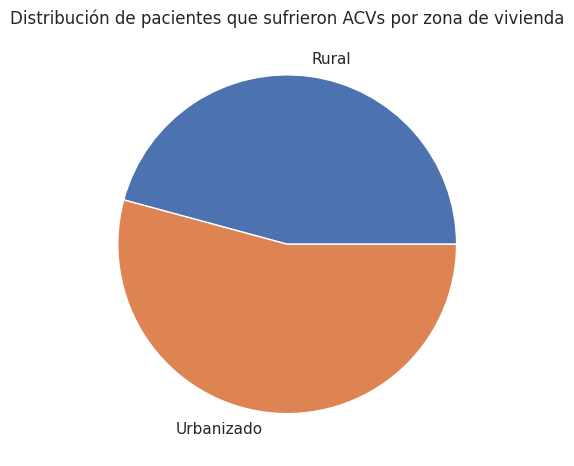

In [54]:
urban_count=df_stroke_true.groupby(['Residence_type'])['Residence_type'].count().reset_index(name='count')
plt.pie(urban_count['count'],labels=['Rural', 'Urbanizado'])
plt.title("Distribución de pacientes que sufrieron ACVs por zona de vivienda")

plt.show()

## Cual es la edad media de las personas que sufren ACVs?

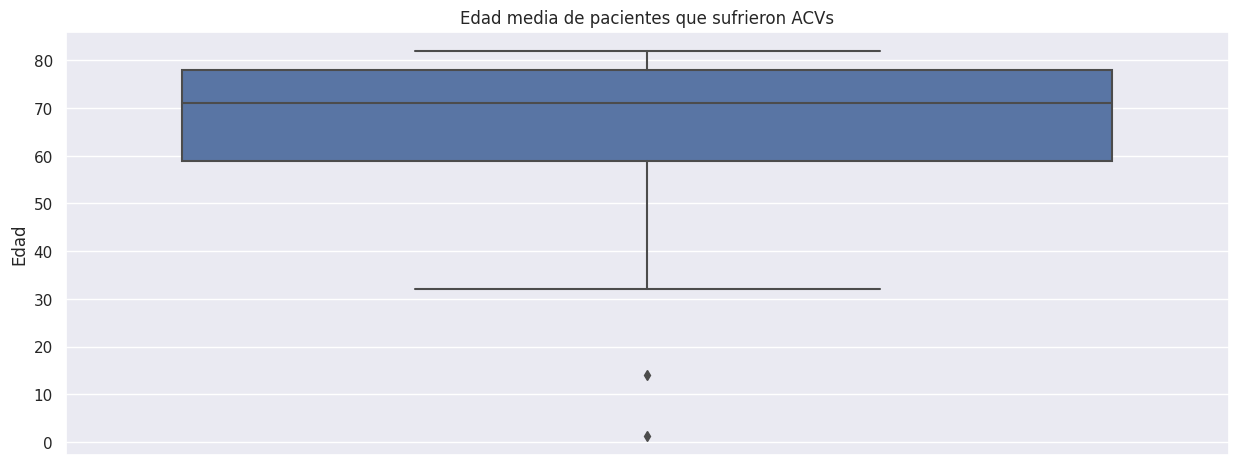

In [55]:
ageACV=sns.boxplot(df_stroke_true,y='age')
ageACV.set(ylabel="Edad", title="Edad media de pacientes que sufrieron ACVs")
plt.show()

## Las personas con un nivel de glucosa alto (avg_glucose_level mayor a 150) tienen mas ACVs que las que tienen un nivel de glucosa normal

<ipython-input-56-e33def67293d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glucose_stroke['high']=df_glucose_stroke['avg_glucose_level']>150


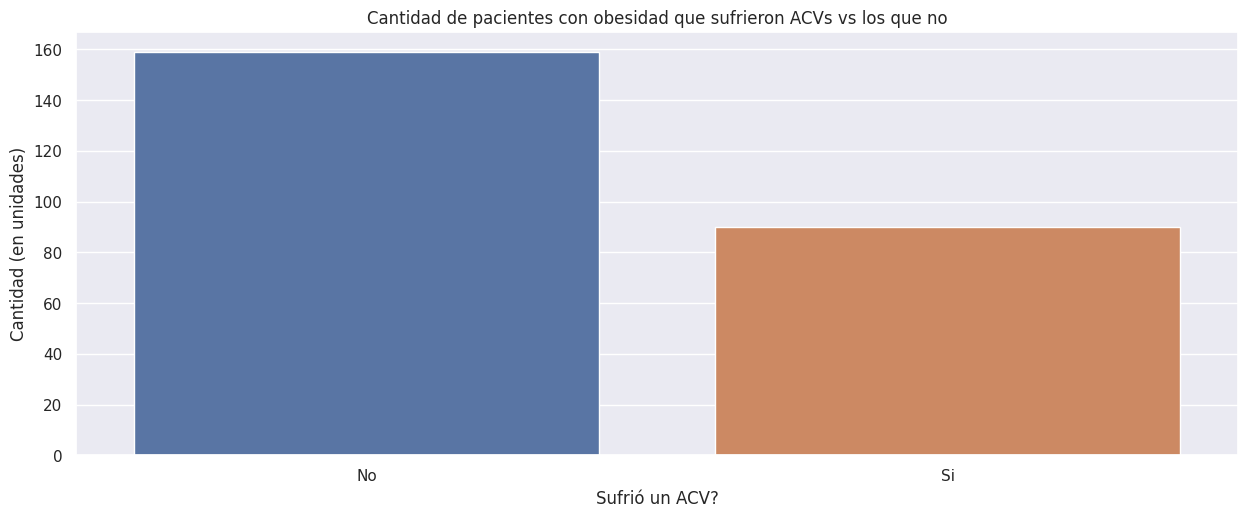

In [56]:
df_glucose_stroke=df_stroke_true
df_glucose_stroke['high']=df_glucose_stroke['avg_glucose_level']>150

highGluocse=sns.countplot(df_glucose_stroke, x='high')
highGluocse.set(xlabel="Sufrió un ACV?", ylabel="Cantidad (en unidades)", xticklabels=["No", "Si"], title="Cantidad de pacientes con obesidad que sufrieron ACVs vs los que no")
plt.show()

# Feature selection

In [57]:
df_without_nulls=df.dropna()
df_without_nulls = df_without_nulls[df_without_nulls['gender'] != 'Other']
rt = {'Urban': True, 'Rural': False}
gender = {'Female': True, 'Male': False}
smoking = {'formerly smoked': 0, 'never smoked': 1, 'smokes':2, 'Unknown':3}
married={'Yes':1, 'No':0}
work={'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
df_without_nulls['Is_urbanized']=df_without_nulls['Residence_type'].map(rt)
df_without_nulls['Is_female']=df_without_nulls['gender'].map(gender)
df_without_nulls['smoking_status']=df_without_nulls['smoking_status'].map(smoking)
df_without_nulls['work_type']=df_without_nulls['work_type'].map(work)
df_without_nulls['ever_married']=df_without_nulls['ever_married'].map(married)
df_without_nulls=df_without_nulls.drop(['id','gender','Residence_type'], axis=1)
df_without_nulls

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Is_urbanized,Is_female
0,67.0,0,1,1,0,228.69,36.6,0,1,True,False
2,80.0,0,1,1,0,105.92,32.5,1,1,False,False
3,49.0,0,0,1,0,171.23,34.4,2,1,True,True
4,79.0,1,0,1,1,174.12,24.0,1,1,False,True
5,81.0,0,0,1,0,186.21,29.0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,3,103.08,18.6,3,0,False,True
5106,81.0,0,0,1,1,125.20,40.0,1,0,True,True
5107,35.0,0,0,1,1,82.99,30.6,1,0,False,True
5108,51.0,0,0,1,0,166.29,25.6,0,0,False,False


## PCA

In [58]:
from sklearn.preprocessing import StandardScaler

# Usamos la función StandarScaler para crear un objeto de estandarización
scaler = StandardScaler()
scaler.fit(df_without_nulls.values) # Esto calcula la media y el desvio estandar
stroke_standarized = scaler.transform(df_without_nulls.values)

stroke_standarized

array([[ 1.06993757, -0.31810241,  4.3814987 , ...,  4.74165093,
         0.98543612, -1.20024032],
       [ 1.64633634, -0.31810241,  4.3814987 , ...,  4.74165093,
        -1.01477913, -1.20024032],
       [ 0.27184695, -0.31810241, -0.22823241, ...,  4.74165093,
         0.98543612,  0.83316648],
       ...,
       [-0.34889019, -0.31810241, -0.22823241, ..., -0.21089701,
        -1.01477913,  0.83316648],
       [ 0.36052369, -0.31810241, -0.22823241, ..., -0.21089701,
        -1.01477913, -1.20024032],
       [ 0.05015511, -0.31810241, -0.22823241, ..., -0.21089701,
         0.98543612,  0.83316648]])

In [67]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(stroke_standarized)
pca_stroke_standarized = pca.transform(stroke_standarized)
pca_stroke_standarized

array([[ 4.10629364,  4.63550549],
       [ 3.28762876,  3.81451661],
       [ 1.92084494,  1.55349952],
       ...,
       [ 0.11717268, -1.02400376],
       [ 1.25865698,  0.16343486],
       [-0.81434736, -0.23761718]])

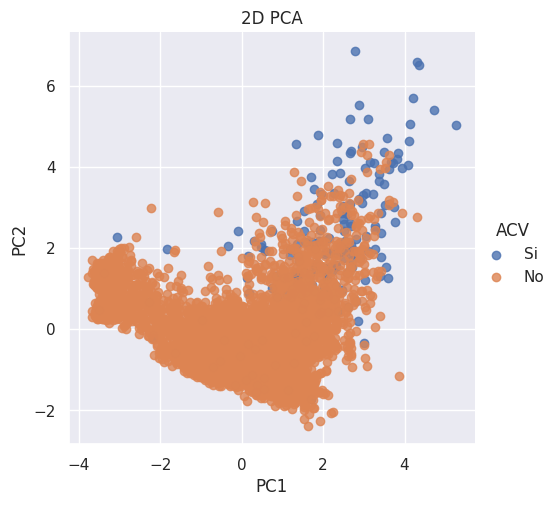

In [75]:
pca_df = pd.DataFrame(
    data=pca_stroke_standarized,
    columns=['PC1', 'PC2'])
target_names = {
    0:'No',
    1:'Si'
}
pca_df['ACV'] = df_without_nulls['stroke']
pca_df['ACV'] = pca_df['ACV'].map(target_names)


sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    hue='ACV',
    fit_reg=False,
    legend=True
    )

plt.title('2D PCA')
plt.show()

Del PCA se pueden obtener dos componentes principales que permiten predecir la ocurrencia de ACVs en los pacientes, encontrandose una "zona gris" donde es dificil identificar si los pacientes podrían sufrirlo o no.

## K-means

In [ ]:
def normalize(df):
    result = df.copy()

    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)

    return result

In [ ]:
df_without_nulls.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'Is_urbanized',
       'Is_female'],
      dtype='object')

In [ ]:

df_norm = normalize(df_without_nulls[['age', 'avg_glucose_level', 'bmi']])
df_norm

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
5,0.987793,0.605161,0.214204
...,...,...,...
5104,0.157715,0.221402,0.095074
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


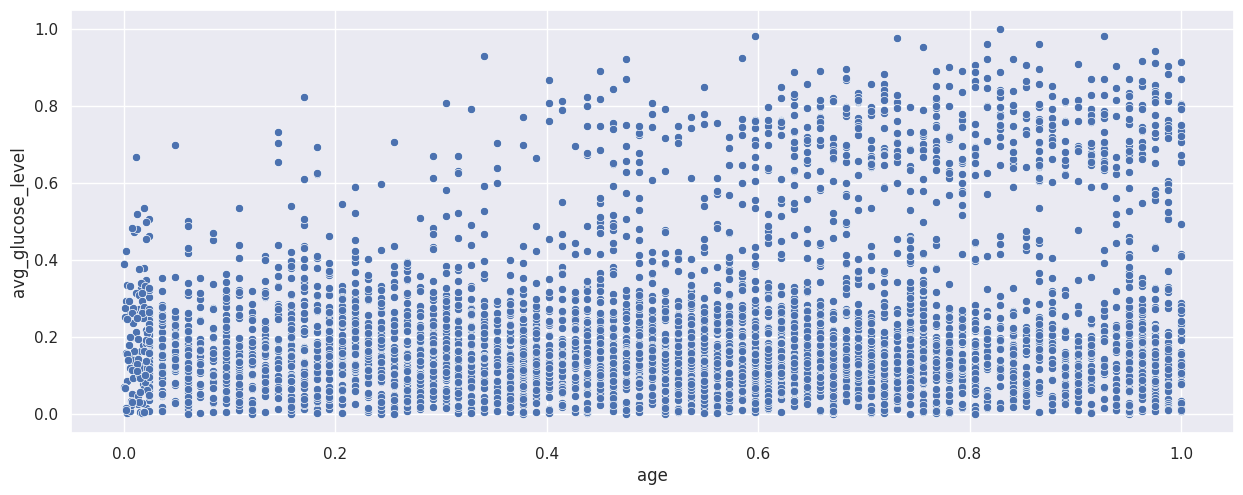

In [ ]:
sns.scatterplot(df_norm, x='age', y='avg_glucose_level')
plt.show()

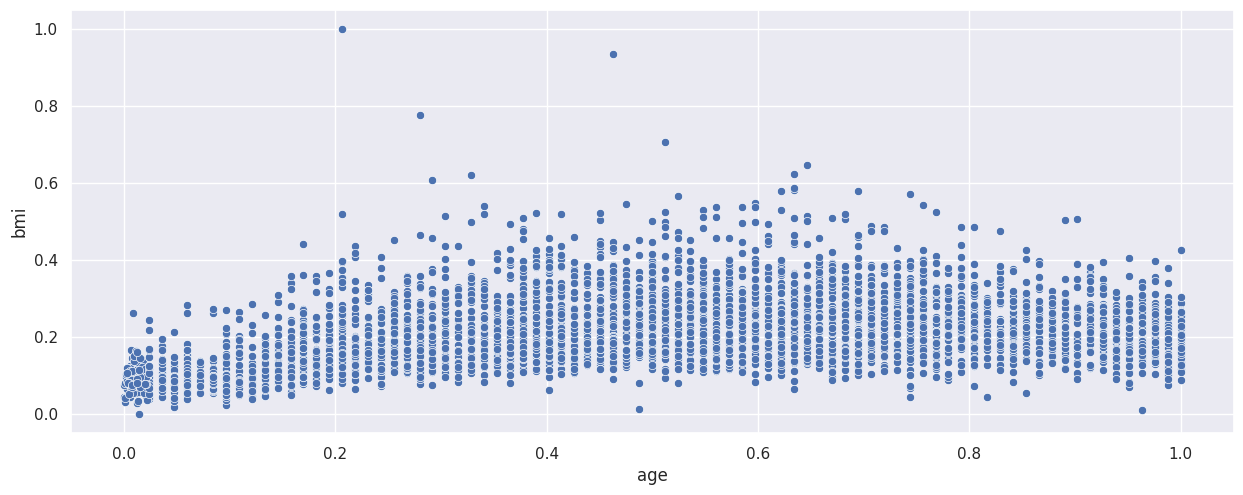

In [ ]:
sns.scatterplot(df_norm, x='age', y='bmi')
plt.show()

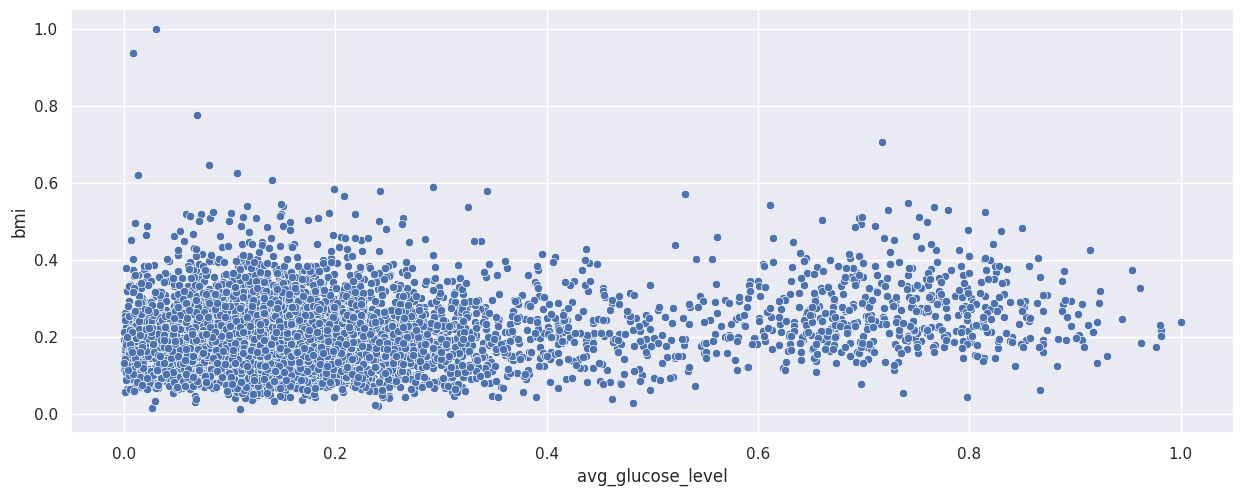

In [ ]:
sns.scatterplot(df_norm, x='avg_glucose_level', y='bmi')
plt.show()

In [ ]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    sum_sq_d.append(km.inertia_)
print(sum_sq_d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[618.1267831454561, 335.6389991262063, 197.6230208684655, 145.28776499394746, 124.98564111306936, 110.1262356759037, 100.42568405205013, 91.13614460819171, 82.96868443532733, 76.69899968665251]


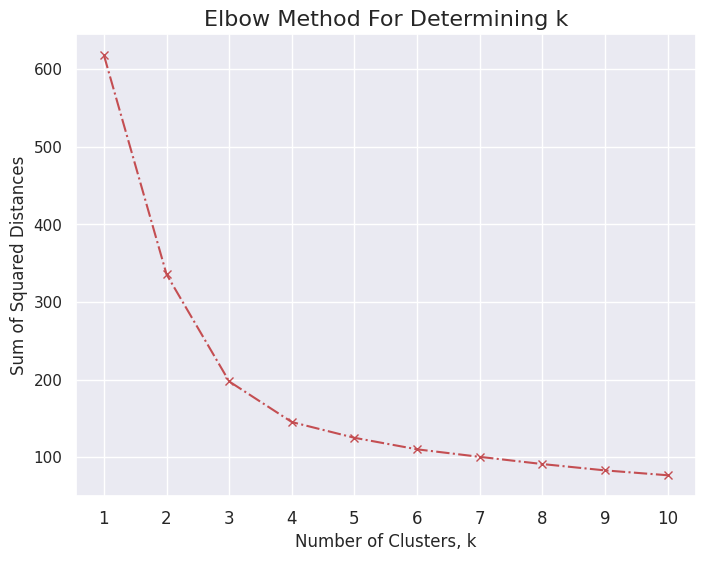

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

In [ ]:
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++')
kmeans.fit(df_norm)

labels = kmeans.predict(df_norm)
centroids = kmeans.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.36459245, 0.15769339, 0.22928072],
       [0.87425765, 0.15380847, 0.21145396],
       [0.74897127, 0.70353013, 0.2653181 ],
       [0.11929023, 0.18624015, 0.12337257],
       [0.61360399, 0.16694741, 0.23921486]])

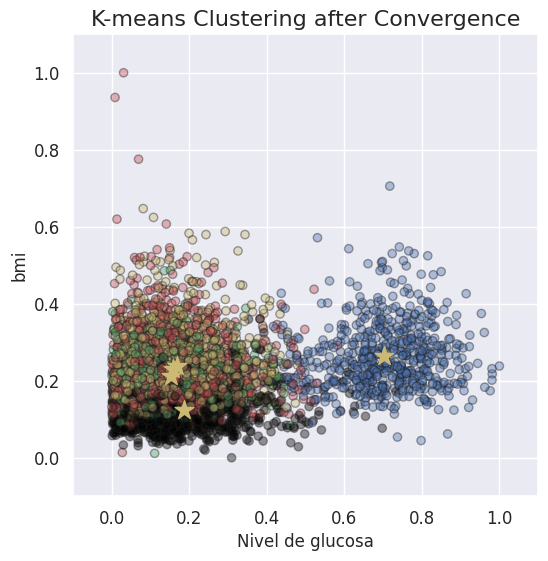

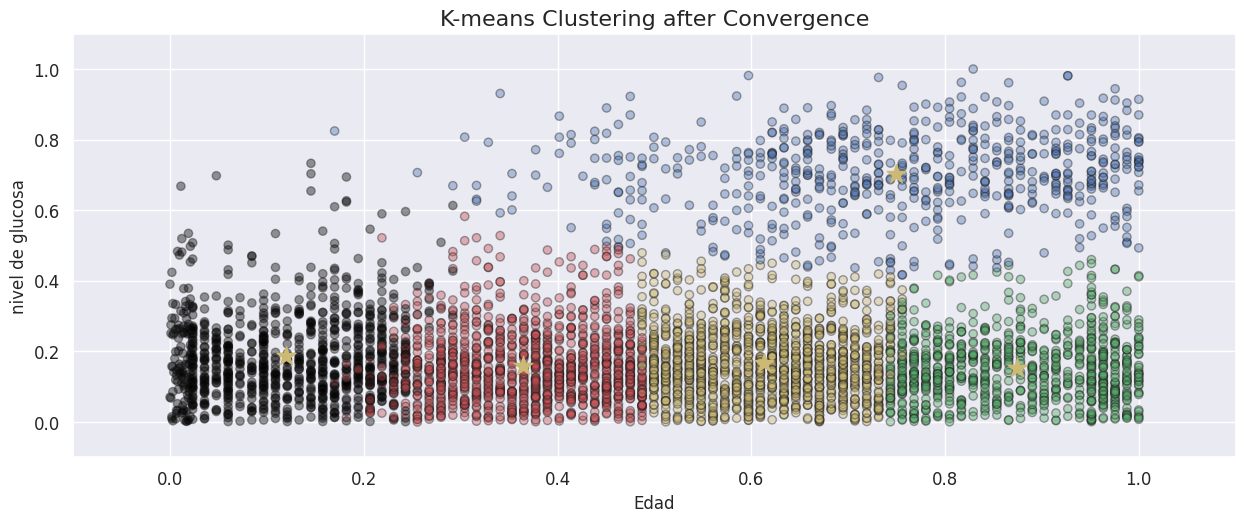

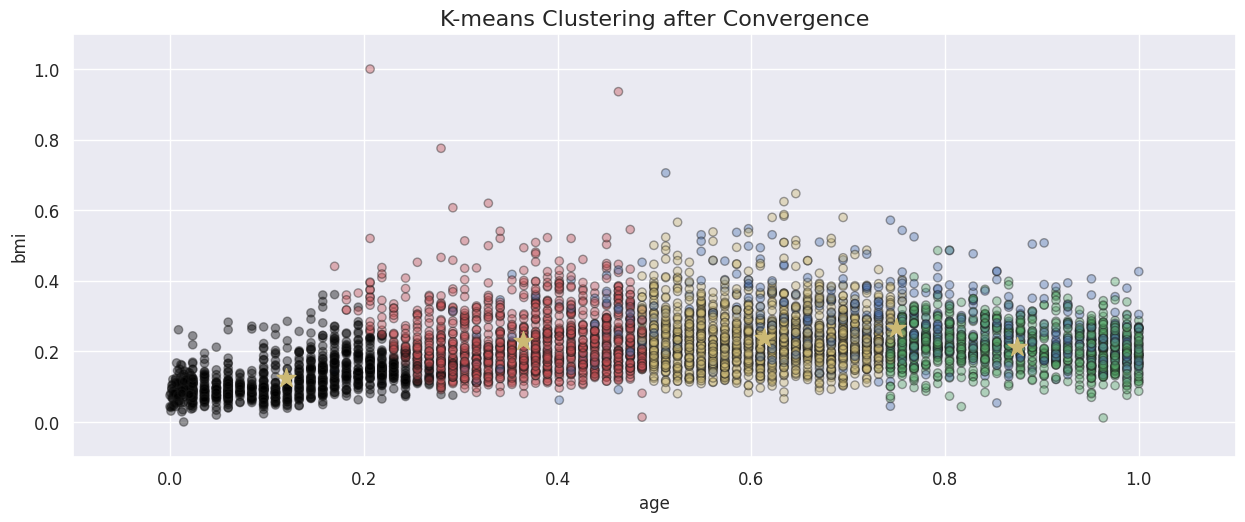

In [ ]:
plt.figure(figsize=(6, 6))
color_map = {1:'r', 2:'g', 3:'b' , 4:'black', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df_norm['avg_glucose_level'], df_norm['bmi'], color=colors, alpha=0.4, edgecolor='k')
#for idx, centroid in enumerate(centroids):
#    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.scatter(centroids[:, 1], centroids[:, 2], marker = "*", s = 200, zorder = 1, color = "y")
plt.xlim(-0.1, 1.1)
plt.xlabel('Nivel de glucosa', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('bmi', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

plt.scatter(df_norm['age'], df_norm['avg_glucose_level'], color=colors, alpha=0.4, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, zorder = 1, color = "y")
plt.xlim(-0.1, 1.1)
plt.xlabel('Edad', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('nivel de glucosa', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

plt.scatter(df_norm['age'], df_norm['bmi'], color=colors, alpha=0.4, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 2], marker = "*", s = 200, zorder = 1, color = "y")
plt.xlim(-0.1, 1.1)
plt.xlabel('age', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.1, 1.1)
plt.ylabel('bmi', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()

A partir del estudio de K means, podemos identificar cuatro grupos/categorias que podrían servir para predecir la distinta probabilidad de ocurrencia de un ACV en los pacientes.